In [2]:
from my_imports import *

In [3]:
import warnings
warnings.filterwarnings('ignore', module='sklearn.metrics.cluster')

In [4]:
df = pd.read_pickle('train_df_sample.pkl')

df = df.reset_index()
df.head()

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,f9e9fbdc82859e7fdcea35523a78f466aa40d1bb7158da...,0.419922,0.033698,0.390381,0.449951,0.390869,0.336670,0.383050,0.000727,0.680176,...,1,U,1,1,1.0,1,1,5.0,1,1
1,824526e632f8f6c497b71cb13ec0a519be76344d472970...,0.603516,0.033983,0.542480,0.651367,0.613281,0.284424,0.238159,0.004951,0.801758,...,13,U,1,0,NaN,0,13,6.0,1,0
2,b73f63bcbb43055d5bc1b0c4365efa407a939455387a25...,0.823730,NaN,0.823730,0.823730,0.823730,0.000104,NaN,0.000104,0.000104,...,0,NaN,0,0,NaN,0,0,NaN,0,0
3,783d9b5d9f6594d1a5a42d8474d328b72e8f2a5adc0a60...,0.925293,0.070185,0.702637,0.964844,0.957031,0.136353,0.149279,0.000043,0.389404,...,13,O,1,13,1.0,1,13,6.0,1,0
4,2f6a347c73f2fd188d6e110f04275bacb5e0550d7d9d6c...,0.864258,0.017011,0.826172,0.890625,0.826172,0.105286,0.137151,0.004486,0.324707,...,13,R,1,0,NaN,0,13,6.0,1,0


탐색적 데이터 분석과 피처 엔지니어링

In [5]:
import hashlib

def encode_customer_id(id_str):
    encoded_id = hashlib.sha256(id_str.encode('utf-8')).hexdigest()[:16]
    return encoded_id

df['customer_ID'] = df['customer_ID'].apply(encode_customer_id)

def drop_null_cols(df, threshold=0.8):
    # 데이터프레임에서 결측치 비율이 threshold 이상인 변수를 제거하는 함수
    null_percent = df.isnull().mean()
    drop_cols = list(null_percent[null_percent >= threshold].index)
    df = df.drop(drop_cols, axis=1)
    print(f"Dropped {len(drop_cols)} columns: {', '.join(drop_cols)}")
    return df


In [6]:
df = drop_null_cols(df)

Dropped 106 columns: D_49_mean, D_49_std, D_49_min, D_49_max, D_49_last, D_73_mean, D_73_std, D_73_min, D_73_max, D_73_last, D_76_mean, D_76_std, D_76_min, D_76_max, D_76_last, R_9_mean, R_9_std, R_9_min, R_9_max, R_9_last, B_29_mean, B_29_std, B_29_min, B_29_max, B_29_last, D_87_mean, D_87_std, D_87_min, D_87_max, D_87_last, D_88_mean, D_88_std, D_88_min, D_88_max, D_88_last, D_106_mean, D_106_std, D_106_min, D_106_max, D_106_last, R_26_mean, R_26_std, R_26_min, R_26_max, R_26_last, D_108_mean, D_108_std, D_108_min, D_108_max, D_108_last, D_110_mean, D_110_std, D_110_min, D_110_max, D_110_last, D_111_mean, D_111_std, D_111_min, D_111_max, D_111_last, B_39_mean, B_39_std, B_39_min, B_39_max, B_39_last, B_42_mean, B_42_std, B_42_min, B_42_max, B_42_last, D_132_mean, D_132_std, D_132_min, D_132_max, D_132_last, D_134_mean, D_134_std, D_134_min, D_134_max, D_134_last, D_135_mean, D_135_std, D_135_min, D_135_max, D_135_last, D_136_mean, D_136_std, D_136_min, D_136_max, D_136_last, D_137_me

In [7]:
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_128",
    "D_126",
    "D_63",
    "D_64",
    "D_68"
]
cat_features = [f"{cf}_last" for cf in cat_features]

In [8]:
import random

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if 'target' not in col and col not in cat_features]
num_cols_sample = random.sample([col for col in num_cols if 'target' not in col], 100)

범주형 변수, 수치형 변수 임의 선택

In [9]:
feature_list = num_cols_sample + cat_features
all_list = feature_list + ['target']

df = df[all_list]

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ


요약 테이블

In [10]:
summary(df)

data shape: (100000, 111)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
R_19_std,float64,1110,1.110,98683,0.0,0.713838,0.003756,0.003108,NaN
B_10_last,float16,0,0.000,9195,-0.002954,804.0,0.12793,0.09491,0.294189
D_60_max,float16,0,0.000,7139,0.000127,1.009766,0.473389,0.936035,0.369629
D_91_max,float16,2807,2.807,1952,0.000008,2.509766,NaN,0.509277,0.009956
B_16_last,float16,2,0.002,6123,0.000001,1.009766,0.090698,0.009926,0.000022
...,...,...,...,...,...,...,...,...,...
D_126_last,float16,0,0.000,2,0.0,1.0,1.0,1.0,0.0
D_63_last,category,0,0.000,6,NaN,NaN,CO,CL,CO
D_64_last,category,1144,1.144,4,NaN,NaN,U,U,NaN
D_68_last,float16,1151,1.151,7,0.0,6.0,5.0,6.0,NaN


In [11]:
import gc
gc.collect()

0

In [12]:
df[cat_features].head()
df[cat_features].dtypes

B_30_last      float16
B_38_last      float16
D_114_last     float16
D_116_last     float16
D_117_last     float16
D_128_last     float16
D_126_last     float16
D_63_last     category
D_64_last     category
D_68_last      float16
dtype: object

In [13]:
df[cat_features] = df[cat_features].astype(str)

In [14]:
df[cat_features].dtypes

B_30_last     object
B_38_last     object
D_114_last    object
D_116_last    object
D_117_last    object
D_128_last    object
D_126_last    object
D_63_last     object
D_64_last     object
D_68_last     object
dtype: object

In [15]:
"""
for categorical_feature in cat_features:
    if df[categorical_feature].dtype == 'float16':
        df[categorical_feature] = df[categorical_feature].astype(str)
    if df[categorical_feature].dtype == 'category':
        df[categorical_feature] = df[categorical_feature].astype(str)
    elif df[categorical_feature].dtype == 'object':
        df[categorical_feature] = df[categorical_feature].astype(str)
        """

"\nfor categorical_feature in cat_features:\n    if df[categorical_feature].dtype == 'float16':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n    if df[categorical_feature].dtype == 'category':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n    elif df[categorical_feature].dtype == 'object':\n        df[categorical_feature] = df[categorical_feature].astype(str)\n        "

In [16]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()

for categorical_feature in cat_features:
    df[categorical_feature].fillna(value='NaN', inplace= True)
    df[categorical_feature] = le_encoder.fit_transform(df[categorical_feature])

In [17]:
from sklearn.impute import SimpleImputer

def impute_nan(df, num_cols, strategy='mean'):
    """
     NaN 값을 strategy에 따라 num_cols에 의해 impute하는 함수
    
    :param df: DataFrame
    :param num_cols: list, imputation 대상 numeric column 리스트
    :param strategy: str, imputation 전략 (default: 'mean')
    :return: DataFrame, imputed DataFrame
    :
    """
    imputer = SimpleImputer(strategy=strategy)
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

df = impute_nan(df, num_cols_sample, strategy="mean")

df.head()

,R_19_std,B_10_last,D_60_max,D_91_max,B_16_last,R_25_std,B_30_count,S_16_mean,B_23_mean,D_115_mean,...,B_38_last,D_114_last,D_116_last,D_117_last,D_128_last,D_126_last,D_63_last,D_64_last,D_68_last,target
0,0.003756,0.127930,0.473389,0.112784,0.090698,0.002427,4.0,0.004417,0.095093,0.089905,...,4,0,0,0,1776,1,1,3,5,1
1,0.003108,0.094910,0.936035,0.509277,0.009926,0.003247,13.0,0.005627,0.021866,0.221924,...,2,0,0,4,5413,1,0,3,6,0
2,0.011005,0.294189,0.369629,0.009956,0.000022,0.010863,1.0,0.007290,0.026627,0.270071,...,0,2,2,7,5829,0,1,4,7,0
3,0.002702,0.294434,0.920898,0.508789,0.002134,0.003013,13.0,0.005249,0.017670,0.290771,...,1,1,0,5,5408,1,1,1,6,0
4,0.002604,0.298340,0.964355,0.009857,0.002724,0.002591,13.0,0.005959,0.023575,0.399902,...,1,1,0,0,5416,1,0,2,6,0


In [18]:
import plotly.express as px

fig2 = px.pie(df, names='target',
              height = 400, width = 600,
              hole = 0.7,
              title = 'target class Overview',
              color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation = 0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                   plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=17, color='#8a8d93'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

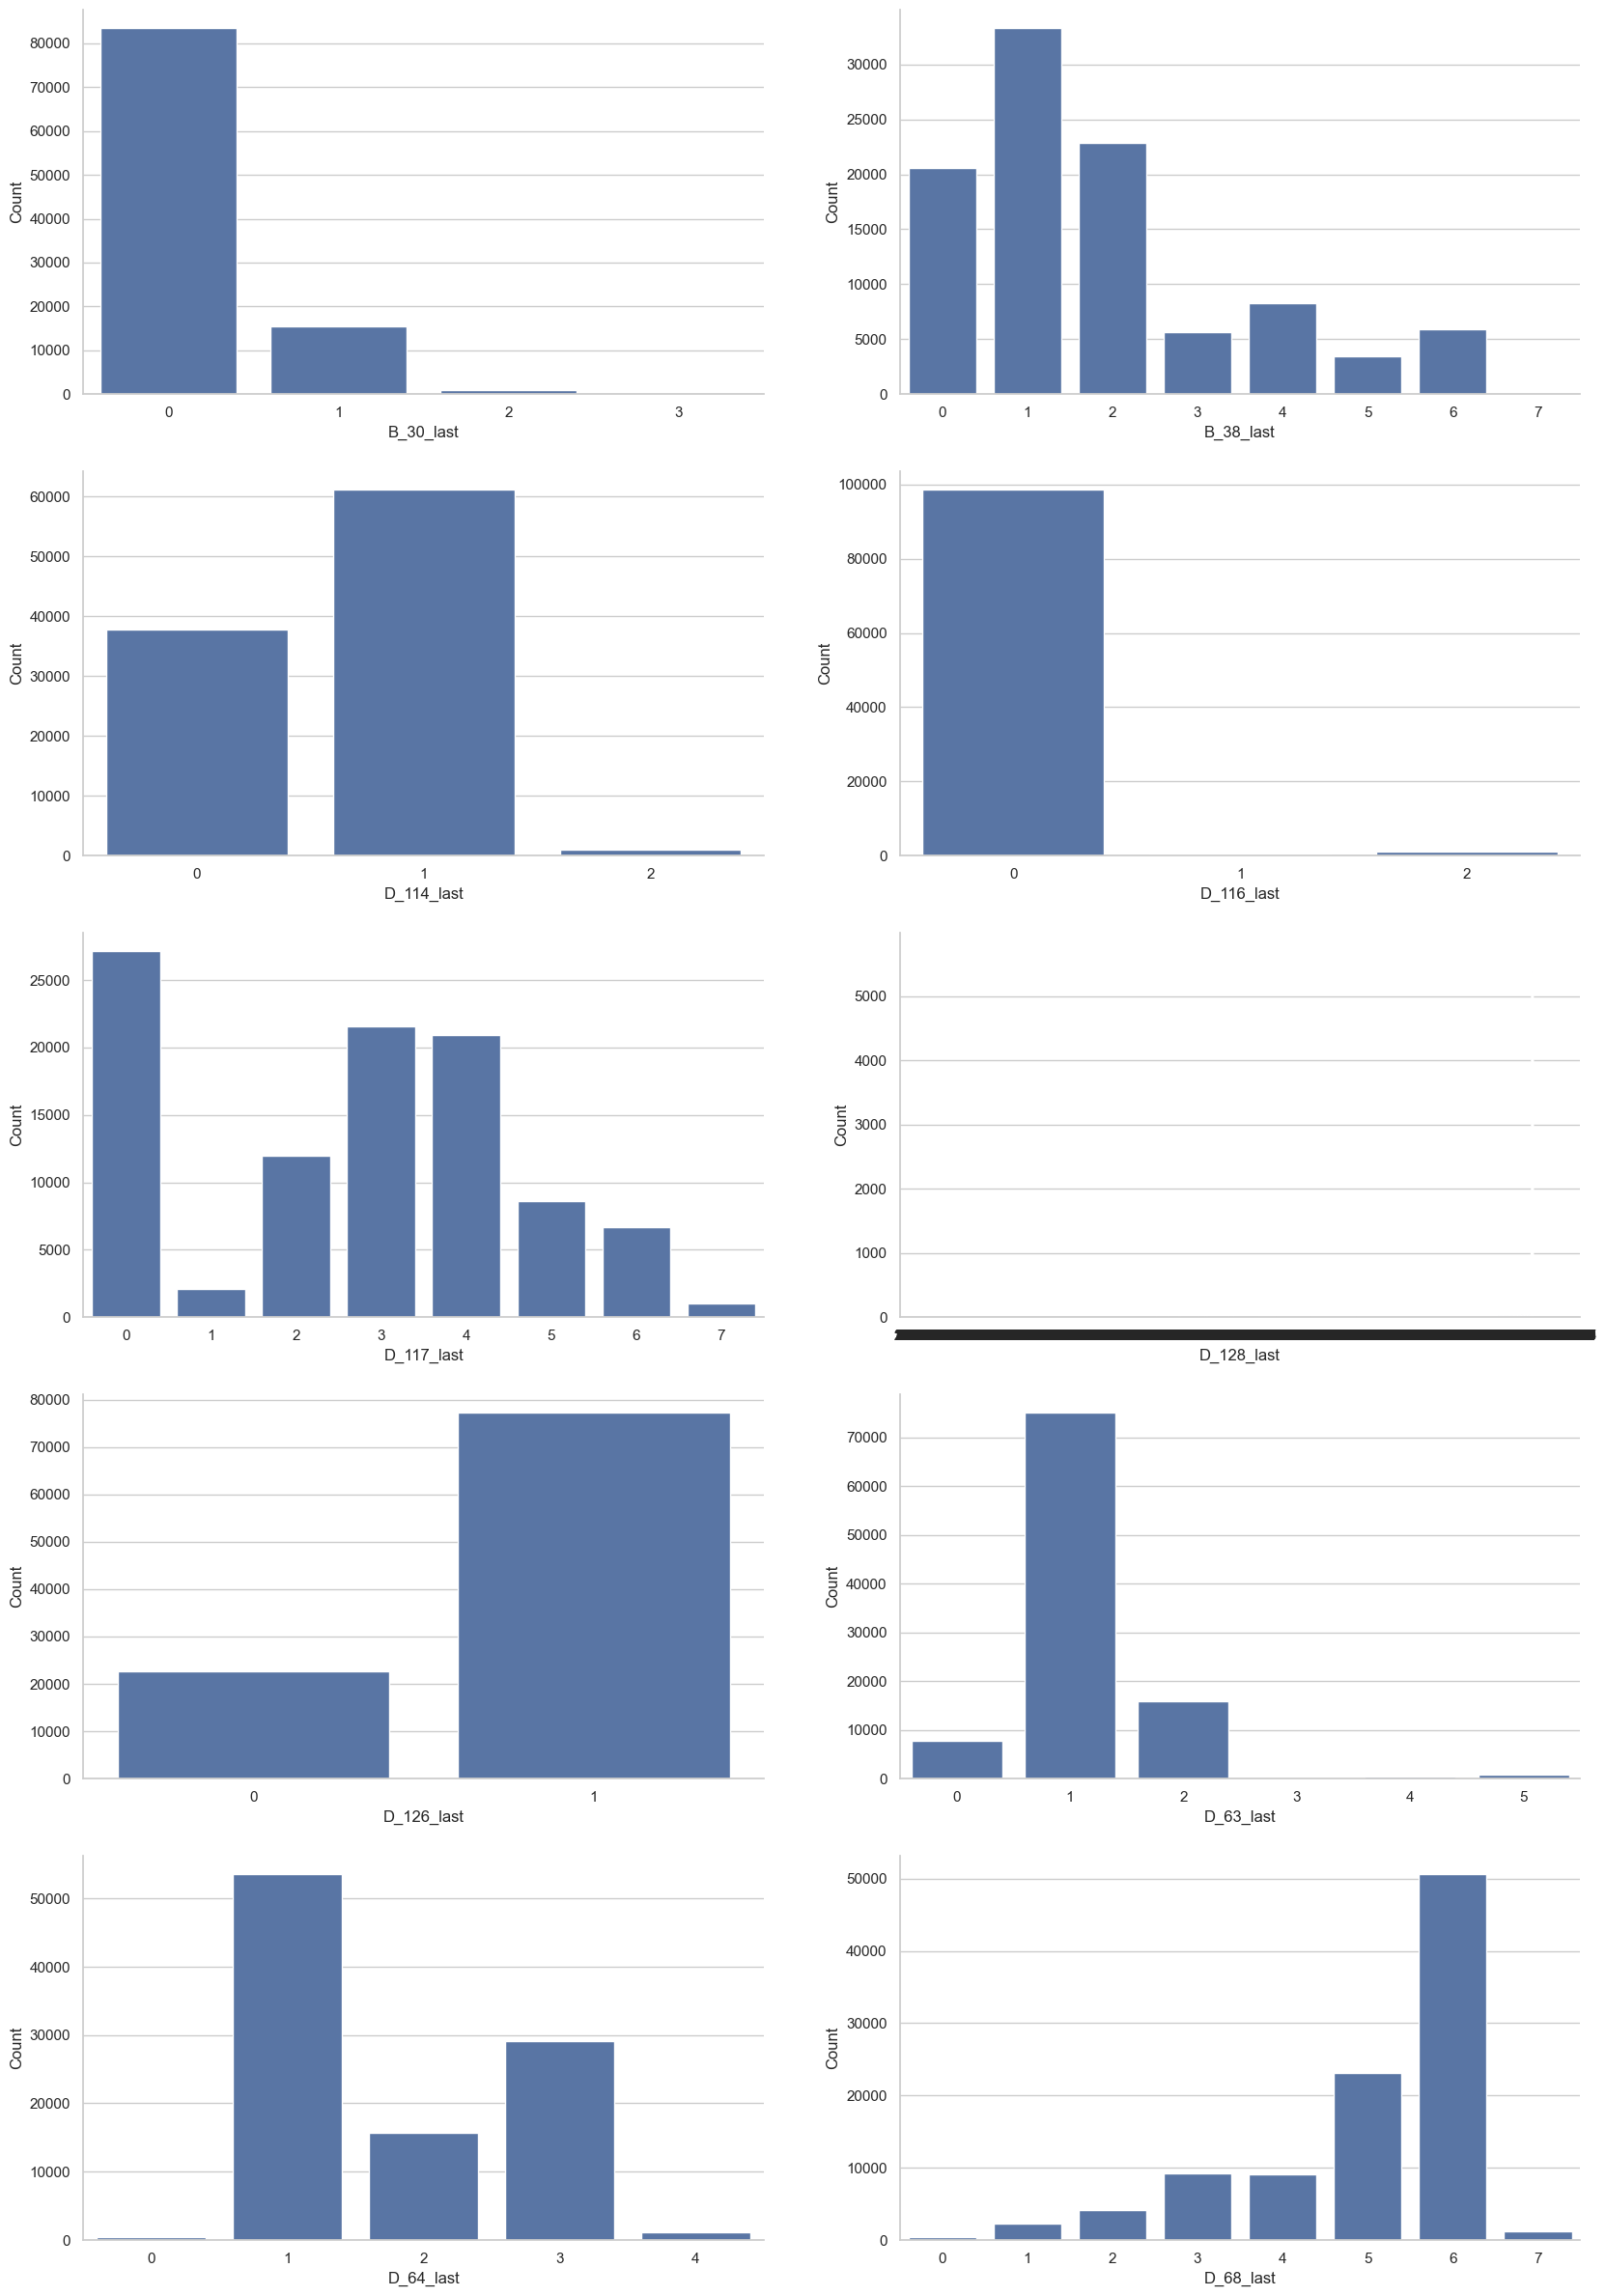

In [21]:
import math
sns.set(style="whitegrid")
fig, axs = plt.subplots(math.ceil(len(cat_features)/2), 2, figsize=(20, 30))
for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("Count")
    sns.despine()
plt.show()

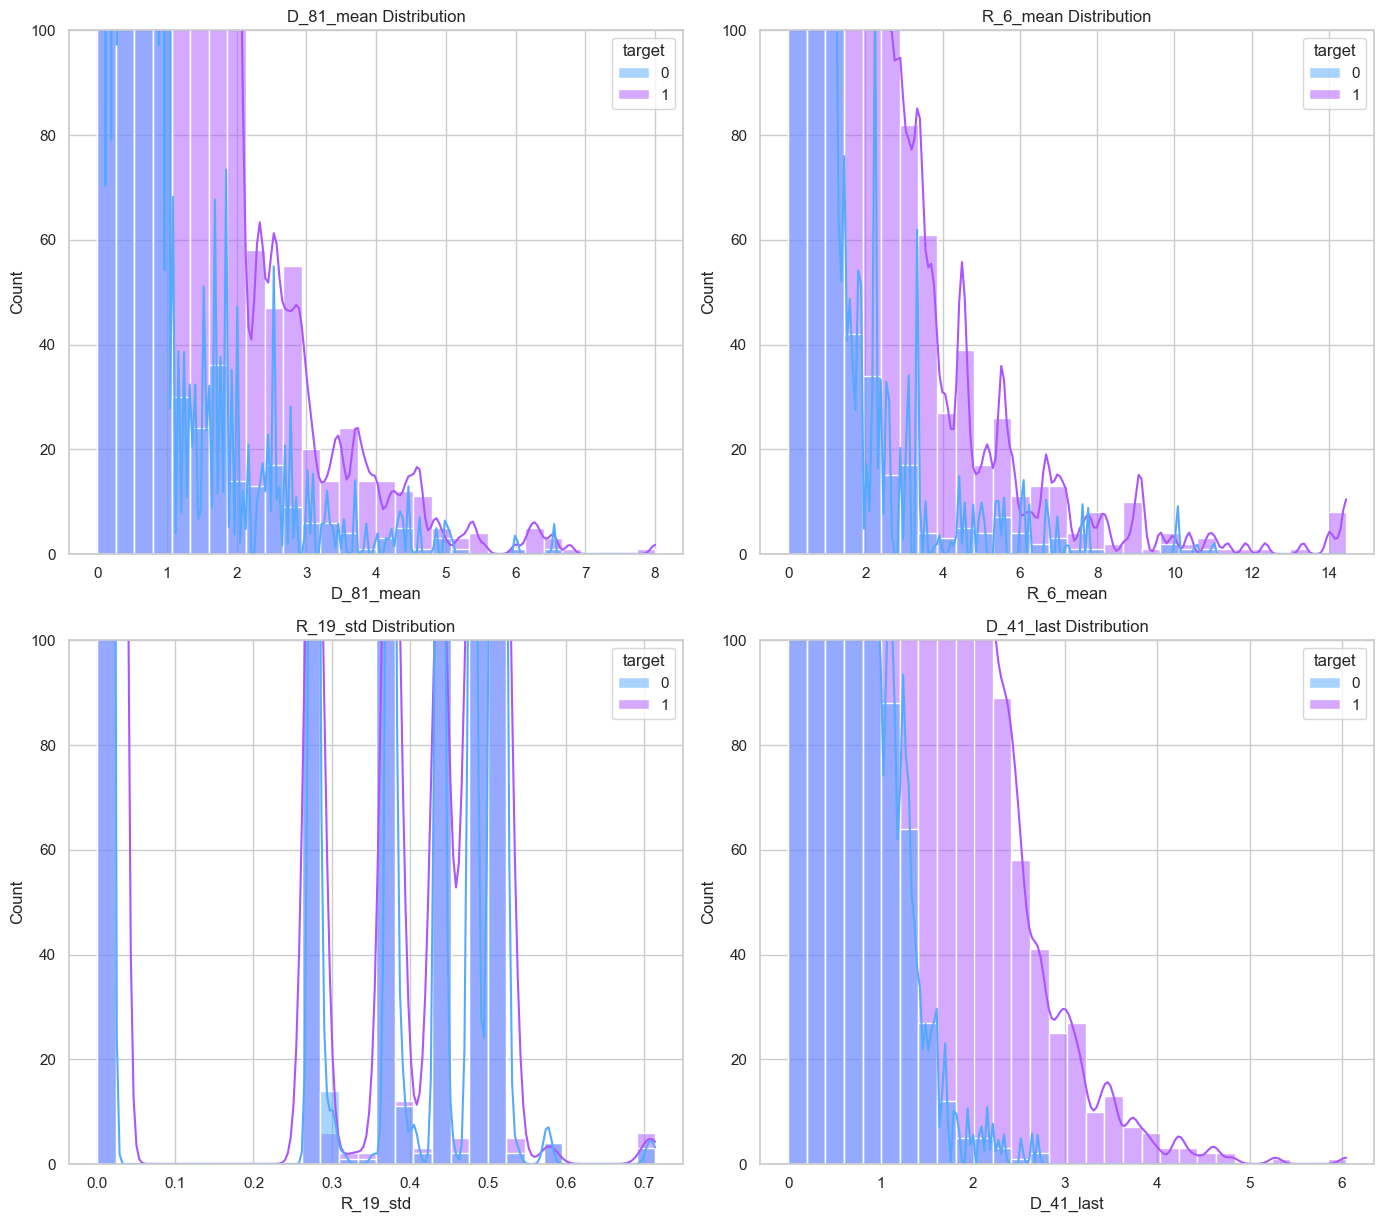

In [29]:
exp_cols = random.sample(num_cols_sample, k=4)

plt.figure(figsize=(14,18))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="target", data=df, bins=30, kde=True, palette='cool')
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()